# Machine Learning Final Project

Group members: Joseph Valle, 	Ujjwal Oli, and Prachi Mahableshwarkar

## Kaggle Dataset: Financial Indicators of US Stocks
https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018

## Project Video Presentation 

https://youtu.be/MgglmWEBbis


## Introduction

As an indicator of large corporations’ profit potential, the daily fluctuations of the stock market continue to draw the attention of economists and investors nationwide today. Unlike bonds, which function as debt instruments distributed by a corporation to help support its projects, stocks represent shares of a corporation’s equity. Based on this observation, and given how stocks are relatively more volatile compared to bonds, with their investments come potentially higher risks and rewards. With respect to their returns however, they have historically outperformed bonds, especially when held for a long period of time.

Clearly, a multitude of factors comes into play in an investor’s decision on whether or not to buy a particular stock. According to the efficient market hypothesis, all of a stock’s information is freely available to the public, and the market reflects all such information in that stock’s shifts. By extension, no investor would possess an unfair advantage with respect to how much insight he can gain on a stock, as the information is already there. Information reflective of a stock’s shifts can include news pertaining to a corporation’s financial status, and any projects that corporation recently completed, for better or worse. Financial status includes variables such as revenue, earnings before income and taxes (EBIT), gross profit margin, and return on equity (ROE). Significant corporate developments often encourage investors to trade a stock more frequently throughout the day than normal, which can play both ways on its ultimate return. While the merits of the efficient market hypothesis are still debated today, given the relative turbulence of the economy and the impact of asymmetric information when conducting transactions, it continues to play some role in how investors trade stocks today.

This project will examine whether we can accurately predict whether or not to buy a stock next year based on more than 200 financial indicators from the current year. Such indicators include economic sector, inventory turnover, and market capitalization. To make our predictions, we can observe a stock’s percent price variation for the next year, which forecasts how its value will change at that time. In applying a binary classification, if this variable comes out positive, the stock will be classified as a buy, and thereby report a class of 1. Otherwise, it will post a class of 0, and should not be bought. However, to prevent overfitting our data, we can omit this variable prior to testing our model. In this manner, we can more accurately determine which indicators can sway an investor’s decision with respect to a stock’s profitability. From there, we can tune our hyperparameters with several approaches to test how we can build a reliable model predicting a stock’s value, regardless of year.

The data for our project covers the years 2014 through 2018, with each year including its very first day of trading to its very last one.


In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
# abspath_curr = '/content/drive/My Drive/Colab Notebooks/Group_Project/'
abspath_curr = '/content/drive/My Drive/Colab Notebooks/GWU Machine Learning/final_project/'

# Get the absolute path of the shallow utilities folder
# abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/utilities/p2_shallow_learning/'
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2021/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
# abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/models/p2_shallow_learning'
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2021/code/models/p2_shallow_learning/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/spring_2021/code/utilities/p2_shallow_learning


Several methods were attempted in training the data and making predictions surrounding which stocks to buy over our time span of interest. Upon first inspection, recall that the data, for its target, included a binary “Class” column. Three strategies - logistic regression, shallow neural networks, and decision trees - were tested in the process. While our primary goal was to obtain a high accuracy score from our model, we also wanted to ensure that in doing so we could avoid overfitting the data where it would not be applicable in future tests. Based on our trial runs, the decision tree method offered us the greatest flexibility in tuning a resilient model that could forecast a stock’s value for the following year.

## Load the data 

In [ ]:
import pandas as pd

#Load the raw stock data for each year and make a copy of it
raw_stocks2014 = pd.read_csv(abspath_curr + '2014_Financial_Data.csv', header=0)
stocks2014 = raw_stocks2014.copy(deep=True)

raw_stocks2015 = pd.read_csv(abspath_curr + '2015_Financial_Data.csv', header=0)
stocks2015 = raw_stocks2015.copy(deep=True)

raw_stocks2016 = pd.read_csv(abspath_curr + '2016_Financial_Data.csv', header=0)
stocks2016 = raw_stocks2016.copy(deep=True)

raw_stocks2017 = pd.read_csv(abspath_curr + '2017_Financial_Data.csv', header=0)
stocks2017 = raw_stocks2017.copy(deep=True)

raw_stocks2018 = pd.read_csv(abspath_curr + '2018_Financial_Data.csv', header=0)
stocks2018 = raw_stocks2018.copy(deep=True)

#Identify the name of the target
target = 'Class'

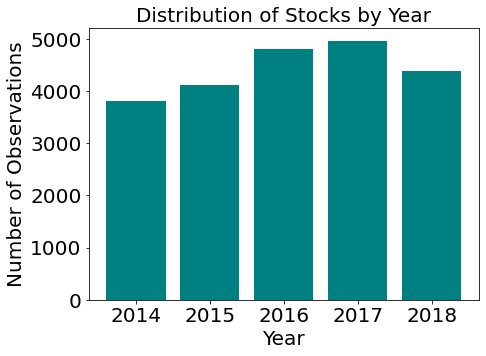

In [ ]:
# Plot the number of observations per year
year = ['2014', '2015', '2016', '2017', '2018']
count = [len(stocks2014), len(stocks2015), len(stocks2016), len(stocks2017), len(stocks2018)]

plt.figure(figsize = [7,5])
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Distribution of Stocks by Year")
plt.bar(year, count, color = "teal")
plt.show()

In [ ]:
#Print the dimensions of 2014's data frame
pd.DataFrame([[stocks2014.shape[0], stocks2014.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,3808,225


In [ ]:
#Print the dimensions of 2015's data frame
pd.DataFrame([[stocks2015.shape[0], stocks2015.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,4120,225


In [ ]:
#Print the dimensions of 2016's data frame
pd.DataFrame([[stocks2016.shape[0], stocks2016.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,4797,225


In [ ]:
#Print the dimensions of 2017's data frame
pd.DataFrame([[stocks2017.shape[0], stocks2017.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,4960,225


In [ ]:
#Print the dimensions of 2018's data frame
pd.DataFrame([[stocks2018.shape[0], stocks2018.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,4392,225


In [ ]:
#Concatenate all the years as df_train and print its dimensions
df_train = pd.concat([stocks2014,stocks2015,stocks2016,stocks2017,stocks2018])
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,22077,229


In [ ]:
#Drop the PRICE VAR [%] columns from df_train and print its dimensions
select_cols = ['2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]','2019 PRICE VAR [%]']
df_train = df_train.drop(select_cols, axis=1)
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,22077,224


## Split into test and train 

As a starting point, after downloading the data from Kaggle, the preprocessing pipeline began by splitting the data into 80% training and 20% testing. The former was further split into 80% training again, along with 20% validation. For these three sets, the unidentified first column was renamed “Ticker” to identify each stock as it is abbreviated in the market and financial news. Apple, for instance, has a ticker of AAPL. 

In [ ]:
from sklearn.model_selection import train_test_split

#Split the training data into 80% training and 20% test and reset the index
df_train, df_test = train_test_split(df_train, train_size=0.8, random_state=random_seed)
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

In [ ]:
#Print the head of df_train
df_train.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,GWR,1.639012e+09,0.0449,5.066440e+08,1.132368e+09,0.0,5.588160e+08,7.107970e+08,4.215710e+08,56162000.0,367862000.0,107107000.0,251000.0,0.0,2.607550e+08,0.0,2.607550e+08,4.71,4.71,53879598.0,55305000.0,0.00,0.690900,0.355000,0.25870,0.159000,0.1019,5.811050e+08,4.240240e+08,2.610060e+08,0.2244,0.159100,5.972700e+07,0.000000e+00,5.972700e+07,3.572780e+08,30251000.0,5.484260e+08,3.788482e+09,1.216478e+09,...,4.7264,1.5603,53.2614,0.1106,-5.8657,0.0751,0.1000,0.1088,-0.0312,-0.0580,-0.0580,0.0282,0.0052,0.0000,0.1885,-0.0223,0.1345,0.1448,0.1257,0.1922,0.2055,0.2692,0.1633,0.2268,0.1635,0.1628,0.1747,0.2100,0.0000,0.0000,0.0000,0.0625,-0.0334,0.0519,0.0677,-0.0057,0.0,0.0423,Industrials,0
1,FTAI,2.176590e+08,0.4635,9.238500e+07,1.252740e+08,0.0,3.030200e+07,1.257180e+08,-4.440000e+05,38827000.0,2088000.0,1954000.0,-23374000.0,0.0,1.340000e+05,0.0,1.340000e+05,0.00,0.00,75771738.0,75766811.0,1.32,0.575600,0.593000,0.18800,0.001000,-1.8121,1.290250e+08,4.091500e+07,-2.324000e+07,0.0096,0.000600,9.280600e+07,0.000000e+00,9.280600e+07,3.107600e+07,0.0,1.240000e+08,1.564079e+09,1.566270e+08,...,8.3022,1.1540,0.0000,0.0001,-6.1098,0.5175,49.7664,0.9659,1.0067,1.0000,1.0000,0.0004,0.0004,0.0000,1.2165,-0.8121,NaN,NaN,0.3844,NaN,NaN,0.0000,NaN,NaN,-0.7687,NaN,NaN,0.0287,NaN,NaN,0.0000,0.4550,0.0000,0.2640,-0.1016,1.7099,0.0,0.0429,Industrials,0
2,IPG,9.056200e+09,0.1894,7.821000e+09,1.235200e+09,0.0,1.386000e+08,2.988000e+08,9.364000e+08,90600000.0,801900000.0,196900000.0,24000000.0,0.0,6.050000e+08,0.0,6.050000e+08,1.52,1.48,397009967.0,397900000.0,0.60,0.136400,0.116000,0.09860,0.067000,0.0345,1.052700e+09,8.925000e+08,6.290000e+08,0.0885,0.066800,1.097600e+09,0.000000e+00,1.097600e+09,5.907800e+09,0.0,7.438000e+09,6.220000e+08,3.674400e+09,...,1.5268,0.5348,0.0000,0.2999,-0.5044,-0.5523,0.0842,0.0704,0.3308,0.3694,0.3578,-0.0250,-0.0185,0.2500,-0.2552,-0.4082,0.0464,0.0860,0.1040,0.5094,0.1701,-0.0291,0.0000,0.0586,0.3370,0.0112,-0.0084,-0.0123,0.0000,0.2011,0.2599,-0.0080,0.0000,-0.0079,0.0525,-0.0314,0.0,-0.9264,Consumer Cyclical,0
3,KWR,7.658600e+08,0.0500,4.926540e+08,2.732060e+08,0.0,1.958500e+08,1.958500e+08,7.735600e+07,2371000.0,80031000.0,23539000.0,1805000.0,0.0,5.649200e+07,0.0,5.649200e+07,4.27,4.26,1326926

In [ ]:
#Rename the first column as Ticker to indicate each stock
df_train = df_train.rename(columns={'Unnamed: 0':'Ticker'})
df_test = df_test.rename(columns={'Unnamed: 0':'Ticker'})

In [ ]:
#Print the head of df_train
df_train.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,GWR,1.639012e+09,0.0449,5.066440e+08,1.132368e+09,0.0,5.588160e+08,7.107970e+08,4.215710e+08,56162000.0,367862000.0,107107000.0,251000.0,0.0,2.607550e+08,0.0,2.607550e+08,4.71,4.71,53879598.0,55305000.0,0.00,0.690900,0.355000,0.25870,0.159000,0.1019,5.811050e+08,4.240240e+08,2.610060e+08,0.2244,0.159100,5.972700e+07,0.000000e+00,5.972700e+07,3.572780e+08,30251000.0,5.484260e+08,3.788482e+09,1.216478e+09,...,4.7264,1.5603,53.2614,0.1106,-5.8657,0.0751,0.1000,0.1088,-0.0312,-0.0580,-0.0580,0.0282,0.0052,0.0000,0.1885,-0.0223,0.1345,0.1448,0.1257,0.1922,0.2055,0.2692,0.1633,0.2268,0.1635,0.1628,0.1747,0.2100,0.0000,0.0000,0.0000,0.0625,-0.0334,0.0519,0.0677,-0.0057,0.0,0.0423,Industrials,0
1,FTAI,2.176590e+08,0.4635,9.238500e+07,1.252740e+08,0.0,3.030200e+07,1.257180e+08,-4.440000e+05,38827000.0,2088000.0,1954000.0,-23374000.0,0.0,1.340000e+05,0.0,1.340000e+05,0.00,0.00,75771738.0,75766811.0,1.32,0.575600,0.593000,0.18800,0.001000,-1.8121,1.290250e+08,4.091500e+07,-2.324000e+07,0.0096,0.000600,9.280600e+07,0.000000e+00,9.280600e+07,3.107600e+07,0.0,1.240000e+08,1.564079e+09,1.566270e+08,...,8.3022,1.1540,0.0000,0.0001,-6.1098,0.5175,49.7664,0.9659,1.0067,1.0000,1.0000,0.0004,0.0004,0.0000,1.2165,-0.8121,NaN,NaN,0.3844,NaN,NaN,0.0000,NaN,NaN,-0.7687,NaN,NaN,0.0287,NaN,NaN,0.0000,0.4550,0.0000,0.2640,-0.1016,1.7099,0.0,0.0429,Industrials,0
2,IPG,9.056200e+09,0.1894,7.821000e+09,1.235200e+09,0.0,1.386000e+08,2.988000e+08,9.364000e+08,90600000.0,801900000.0,196900000.0,24000000.0,0.0,6.050000e+08,0.0,6.050000e+08,1.52,1.48,397009967.0,397900000.0,0.60,0.136400,0.116000,0.09860,0.067000,0.0345,1.052700e+09,8.925000e+08,6.290000e+08,0.0885,0.066800,1.097600e+09,0.000000e+00,1.097600e+09,5.907800e+09,0.0,7.438000e+09,6.220000e+08,3.674400e+09,...,1.5268,0.5348,0.0000,0.2999,-0.5044,-0.5523,0.0842,0.0704,0.3308,0.3694,0.3578,-0.0250,-0.0185,0.2500,-0.2552,-0.4082,0.0464,0.0860,0.1040,0.5094,0.1701,-0.0291,0.0000,0.0586,0.3370,0.0112,-0.0084,-0.0123,0.0000,0.2011,0.2599,-0.0080,0.0000,-0.0079,0.0525,-0.0314,0.0,-0.9264,Consumer Cyclical,0
3,KWR,7.658600e+08,0.0500,4.926540e+08,2.732060e+08,0.0,1.958500e+08,1.958500e+08,7.735600e+07,2371000.0,80031000.0,23539000.0,1805000.0,0.0,5.649200e+07,0.0,5.649200e+07,4.27,4.26,13269266.0,

In [ ]:
#Print the head of df_test
df_test.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,NVEC,2.832620e+07,0.0220,6.078294e+06,2.224790e+07,3344101.0,1458598.0,4.802699e+06,1.744520e+07,0.0,1.909601e+07,6147142.0,0.0,0.0,1.294887e+07,0.0,1.294887e+07,2.68,2.68,4837010.0,4836602.0,4.000,0.7854,0.715,0.6741,0.457,0.4187,2.024346e+07,1.909601e+07,1.294887e+07,0.6741,0.4571,8199364.0,19591833.0,27791197.0,3.436802e+06,3.358298e+06,3.519358e+07,1.413248e+06,0.0,...,9.9725,19.7423,8.6314,0.1397,-0.1075,0.0544,0.0506,0.0712,0.0534,0.0593,0.0593,-0.0028,-0.0029,0.0000,-0.1349,-0.1542,0.0510,-0.0035,0.0309,0.0792,-0.0085,0.0004,0.0997,0.0244,0.0526,0.1400,0.0244,-0.0358,0.0000,0.0000,0.0000,0.5315,0.0478,-0.0702,-0.0637,0.0000,0.0924,-0.1679,Technology,1
1,SCSC,3.540226e+09,0.0999,3.184786e+09,3.554400e+08,0.0,240115000.0,2.572690e+08,9.817100e+07,2124000.0,9.601000e+07,32391000.0,0.0,0.0,6.361900e+07,0.0,6.361900e+07,2.40,2.38,25663707.0,26472000.0,0.000,0.1004,0.033,0.0277,0.018,0.0113,1.152880e+08,9.813400e+07,6.361900e+07,0.0271,0.0180,61400000.0,0.0,61400000.0,5.595570e+08,5.585810e+08,1.228905e+09,5.238800e+07,143842000.0,...,6.5433,1.8040,6.3694,0.0821,-0.4564,0.0867,-0.0351,-0.0570,-0.0275,0.0480,0.0485,-0.0730,-0.0733,0.0000,-0.3087,-0.2672,0.0743,0.0615,0.0889,0.1430,0.3775,-0.2492,0.0440,-0.0256,0.2441,0.1056,0.0600,0.0530,0.0000,0.0000,0.0000,0.0709,0.0100,0.0096,0.0328,7.7079,0.0000,0.1381,Technology,0
2,SO,1.846700e+10,0.0808,1.201200e+10,6.455000e+09,0.0,0.0,1.945000e+09,4.510000e+09,835000000.0,3.008000e+09,977000000.0,0.0,0.0,2.031000e+09,68000000.0,1.963000e+09,2.19,2.18,899812716.0,897000000.0,2.083,0.3495,0.332,0.2081,0.106,0.0250,6.136000e+09,3.843000e+09,2.031000e+09,0.1629,0.1100,710000000.0,0.0,710000000.0,1.947000e+09,1.969000e+09,5.864000e+09,5.486800e+10,0.0,...,9.8072,2.7060,8.6557,0.0971,-5.9677,0.0188,0.1360,0.0169,0.1940,0.1649,0.1658,0.0228,0.0227,0.0348,-0.0463,-0.0906,0.0264,0.0078,-0.0003,0.0592,0.0957,-0.0200,0.0089,0.0106,-0.0507,0.0531,0.0354,0.0302,0.0394,0.0376,0.0361,0.0704,-0.1432,0.0881,0.0352,0.0636,0.0000,0.0000,Utilities,1
3,RDUS,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,68280000.0,30797000.0,9.907700e+07,-9.907700e+07,1885000.0,-1.015260e+08,0.0,0.0,0.0,-1.015260e+08,0.0,-1.015260e+08,-2.56,-2.56,42922227.0,39643099.0,0.000,0.0000,NaN,0.0000,NaN,0.0000,-9.946500

## Split the training data into train and validation set

In [ ]:
#Split the training data into 80% training and 20% validation and reset the index
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
#Print the dimensions of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,14128,224


In [ ]:
#Print the dimensions of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows','# columns'])

,# rows,# columns
0,3533,224


## Remove uncommon features

In [ ]:
#Call and print common var_checker
df_common_var = common_var_checker(df_train, df_val, df_test, target)
df_common_var

,common var
0,10Y Dividend per Share Growth (per Share)
1,10Y Net Income Growth (per Share)
2,10Y Operating CF Growth (per Share)
3,10Y Revenue Growth (per Share)
4,10Y Shareholders Equity Growth (per Share)
...,...
219,returnOnAssets
220,returnOnCapitalEmployed
221,returnOnEquity
222,shortTermCoverageRatios


In [ ]:
#Find and print the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
#Find the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
#Find the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
#Remove the uncommon features from df_train, df_val, and df_test
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

In [ ]:
#Print the head of df_train
df_train.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,ACAD,124901000.0,6.2068,9077000.0,115824000.0,149189000.0,255062000.0,408234000.0,-292410000.0,0.0,-288284000.0,1119000.0,0.0,0.0,-289403000.0,0.0,-289403000.0,-2.36,-2.36,124205637.0,122600000.0,0.00,0.9273,-2.286,-2.3081,-2.317,-1.7499,-285571000.0,-288284000.0,-289403000.0,-2.3081,-2.3171,71893000.0,271924000.0,343817000.0,18430000.0,5248000.0,373477000.0,2662000.0,5538000.0,...,9.7693,6.8612,26.5098,-0.8632,-0.0066,7.1246,-0.0675,-0.0718,-0.0664,-0.0085,-0.0085,0.0582,0.0582,0.0000,-0.0449,-0.0412,0.1685,0.6283,8.4690,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0167,0.1214,-0.0493,0.0000,0.0000,0.0000,1.5812,0.2570,-0.3148,-0.3888,0.0000,0.5026,0.3679,Healthcare,0
1,JOUT,430489000.0,0.0119,258756000.0,171733000.0,16483000.0,137397000.0,153880000.0,17853000.0,865000.0,15753000.0,5137000.0,0.0,0.0,10616000.0,0.0,10616000.0,1.08,1.06,10006982.0,9727000.0,0.30,0.3989,0.066,0.0386,0.025,0.0178,28320000.0,16618000.0,10616000.0,0.0366,0.0247,69159000.0,0.0,69159000.0,44798000.0,79919000.0,198721000.0,45287000.0,25980000.0,...,9.6468,3.0407,5.8866,0.0536,-1.0686,0.0185,-0.0874,0.0696,0.1637,0.1613,0.1778,0.0099,0.0095,0.0000,-0.4564,-0.6408,0.0041,0.0132,0.0020,-0.0447,-0.0281,-0.1818,0.0325,0.0902,0.0031,0.0092,0.0824,0.0318,0.0000,0.0000,0.0000,0.0078,0.2047,0.0366,-0.0122,-0.0463,0.0010,0.0820,Consumer Cyclical,1
2,ITI,72251000.0,0.0590,44069000.0,28182000.0,5396000.0,24425000.0,30252000.0,-2070000.0,0.0,-1886000.0,-816000.0,0.0,-207000.0,-1070000.0,0.0,-1070000.0,-0.03,-0.03,32553876.0,32595000.0,0.00,0.3901,-0.011,-0.0261,-0.015,0.0359,-764000.0,-1886000.0,-1070000.0,-0.0261,-0.0148,21961000.0,0.0,21961000.0,15472000.0,3062000.0,44513000.0,1990000.0,18305000.0,...,4.2963,3.0512,25.7671,-0.0191,-0.0303,0.0850,-1.8926,-2.0102,-1.7594,-1.7500,-1.7500,-0.0021,-0.0077,0.0000,0.0925,0.0278,0.0191,0.0796,0.0915,0.1676,-0.1034,0.7785,0.0000,0.0000,0.0000,0.0954,0.0025,0.0198,0.0000,0.0000,0.0000,-0.1481,0.2027,0.0004,-0.0244,0.0000,0.3393,0.2676,Technology,1
3,CATO,849981000.0,-0.1114,553058000.0,296923000.0,0.0,266304000.0,285947000.0,10976000.0,114000.0,15973000.0,7433000.0,0.0,0.0,8540000.0,0.0,8540000.0,0.34,0.34,25031849.0,25031849.0,1.32,0.3493,0.042,0.0189,0.010,0.0293,35730000.0,16087000.0,8540000.0,0.0188,0.0100,

In [ ]:
#Print the head of df_val
df_val.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,INTT,3.888900e+07,-0.0696,2.019100e+07,1.869800e+07,3935000.0,1.220100e+07,1.613600e+07,2.562000e+06,0.0,2583000.0,722000.0,0.0,0.0,1861000.0,0.0,1861000.0,0.18,0.18,10562678.0,10473210.0,0.00,0.4808,0.086,0.0664,0.048,0.0745,3.337000e+06,2.583000e+06,1861000.0,0.0664,0.0479,2.571000e+07,0.0,2.571000e+07,4.395000e+06,3.520000e+06,3.426400e+07,1.112000e+06,2.810000e+06,...,8.2488,7.4092,10.6706,0.0518,-0.0572,-0.0862,-0.4738,-0.4788,-0.4589,-0.4545,-0.4545,0.0040,0.0027,0.0000,-0.3180,-0.3268,-0.0478,-0.0424,-0.0419,0.2214,-0.1230,-0.1977,0.0000,-0.2449,-0.0540,0.0285,0.1637,0.0820,0.0000,0.0000,-1.0000,-0.1269,-0.0661,0.0322,0.0410,0.0000,0.0992,0.0196,Technology,1
1,CNMD,7.963920e+08,0.0431,3.653510e+08,4.310410e+08,32307000.0,3.517990e+08,3.841060e+08,4.693500e+07,18203000.0,28732000.0,-26755000.0,0.0,0.0,55487000.0,0.0,55487000.0,1.99,1.97,27933864.0,27933864.0,0.80,0.5412,0.084,0.0589,0.070,0.0662,6.701400e+07,4.693500e+07,55487000.0,0.0361,0.0697,3.262200e+07,0.0,3.262200e+07,1.670370e+08,1.414360e+08,3.567830e+08,1.162290e+08,8.168940e+08,...,5.0520,5.3185,5.7438,0.0879,-0.4597,0.0556,0.3513,0.3513,2.7839,2.7547,2.7885,0.0040,0.0074,0.0000,0.6440,0.7397,0.0162,0.0115,0.0198,0.0019,-0.0682,-0.0029,0.0396,0.0693,0.1931,0.0250,0.0119,0.0229,0.0000,0.0592,0.0000,0.1268,0.0410,0.0218,0.0833,-0.0242,0.0016,0.0396,Healthcare,1
2,RELV,5.734496e+07,-0.1592,1.165773e+07,4.568723e+07,0.0,2.504860e+07,4.559150e+07,9.573000e+04,100142.0,-23431.0,-748000.0,0.0,0.0,724569.0,0.0,724569.0,0.42,0.42,1809374.0,1809427.0,0.00,0.7967,0.018,0.0013,0.013,-0.0227,1.038442e+06,7.671100e+04,724569.0,-0.0004,0.0126,4.989392e+06,0.0,4.989392e+06,3.867380e+05,5.177465e+06,1.153321e+07,6.925970e+06,2.925775e+06,...,172.4090,2.5489,11.0362,0.0426,-0.5019,-0.1568,-0.9493,-0.9363,-0.0670,0.0000,0.0000,0.0037,0.0037,-1.0000,-1.1553,-1.6067,-0.0308,-0.0733,-0.0868,0.0000,0.0000,0.0000,-0.1642,-0.2176,-0.1214,0.0146,0.0712,0.0481,-1.0000,-1.0000,-1.0000,0.3887,-0.0071,-0.0272,0.0498,-0.0270,0.0000,-0.0975,Consumer Defensive,0
3,QRTEA,1.049900e+10,0.0274,6.684000e+09,3.815000e+09,0.0,1.202000e+09,2.627000e+09,1.188000e+09,387000000.0,774000000.0,237000000.0,89000000.0,-88000000.0,537000000.0,17000000.0,520000000.0,1.07,1.06,475981509.0,475981509.

In [ ]:
#Print the head of df_test
df_test.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,NVEC,2.832620e+07,0.0220,6.078294e+06,2.224790e+07,3344101.0,1458598.0,4.802699e+06,1.744520e+07,0.0,1.909601e+07,6147142.0,0.0,0.0,1.294887e+07,0.0,1.294887e+07,2.68,2.68,4837010.0,4836602.0,4.000,0.7854,0.715,0.6741,0.457,0.4187,2.024346e+07,1.909601e+07,1.294887e+07,0.6741,0.4571,8199364.0,19591833.0,27791197.0,3.436802e+06,3.358298e+06,3.519358e+07,1.413248e+06,0.0,...,9.9725,19.7423,8.6314,0.1397,-0.1075,0.0544,0.0506,0.0712,0.0534,0.0593,0.0593,-0.0028,-0.0029,0.0000,-0.1349,-0.1542,0.0510,-0.0035,0.0309,0.0792,-0.0085,0.0004,0.0997,0.0244,0.0526,0.1400,0.0244,-0.0358,0.0000,0.0000,0.0000,0.5315,0.0478,-0.0702,-0.0637,0.0000,0.0924,-0.1679,Technology,1
1,SCSC,3.540226e+09,0.0999,3.184786e+09,3.554400e+08,0.0,240115000.0,2.572690e+08,9.817100e+07,2124000.0,9.601000e+07,32391000.0,0.0,0.0,6.361900e+07,0.0,6.361900e+07,2.40,2.38,25663707.0,26472000.0,0.000,0.1004,0.033,0.0277,0.018,0.0113,1.152880e+08,9.813400e+07,6.361900e+07,0.0271,0.0180,61400000.0,0.0,61400000.0,5.595570e+08,5.585810e+08,1.228905e+09,5.238800e+07,143842000.0,...,6.5433,1.8040,6.3694,0.0821,-0.4564,0.0867,-0.0351,-0.0570,-0.0275,0.0480,0.0485,-0.0730,-0.0733,0.0000,-0.3087,-0.2672,0.0743,0.0615,0.0889,0.1430,0.3775,-0.2492,0.0440,-0.0256,0.2441,0.1056,0.0600,0.0530,0.0000,0.0000,0.0000,0.0709,0.0100,0.0096,0.0328,7.7079,0.0000,0.1381,Technology,0
2,SO,1.846700e+10,0.0808,1.201200e+10,6.455000e+09,0.0,0.0,1.945000e+09,4.510000e+09,835000000.0,3.008000e+09,977000000.0,0.0,0.0,2.031000e+09,68000000.0,1.963000e+09,2.19,2.18,899812716.0,897000000.0,2.083,0.3495,0.332,0.2081,0.106,0.0250,6.136000e+09,3.843000e+09,2.031000e+09,0.1629,0.1100,710000000.0,0.0,710000000.0,1.947000e+09,1.969000e+09,5.864000e+09,5.486800e+10,0.0,...,9.8072,2.7060,8.6557,0.0971,-5.9677,0.0188,0.1360,0.0169,0.1940,0.1649,0.1658,0.0228,0.0227,0.0348,-0.0463,-0.0906,0.0264,0.0078,-0.0003,0.0592,0.0957,-0.0200,0.0089,0.0106,-0.0507,0.0531,0.0354,0.0302,0.0394,0.0376,0.0361,0.0704,-0.1432,0.0881,0.0352,0.0636,0.0000,0.0000,Utilities,1
3,RDUS,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,68280000.0,30797000.0,9.907700e+07,-9.907700e+07,1885000.0,-1.015260e+08,0.0,0.0,0.0,-1.015260e+08,0.0,-1.015260e+08,-2.56,-2.56,42922227.0,39643099.0,0.000,0.0000,NaN,0.0000,NaN,0.0000,-9.946500

## Data Exploration: Feature Distribution and Correlations 

Alongside these steps, a preliminary examination of the data showed that the distribution between years was not uniform. Of all the years in our time span, 2017 listed the greatest number of stocks. As will be discussed later, this observation underlined the need to prevent overfitting that would weaken the reliability of our model. On a side note, there was significant variation in terms of the sector for which a stock was associated, when observed over the whole time span. From this distribution, most companies were based on financial services.

In [ ]:
df_train.describe

<bound method NDFrame.describe of       Ticker       Revenue  ...              Sector  Class
0       ACAD  1.249010e+08  ...          Healthcare      0
1       JOUT  4.304890e+08  ...   Consumer Cyclical      1
2        ITI  7.225100e+07  ...          Technology      1
3       CATO  8.499810e+08  ...   Consumer Cyclical      1
4        TSC  1.034230e+08  ...  Financial Services      1
...      ...           ...  ...                 ...    ...
14123   MYGN  7.437000e+08  ...          Healthcare      0
14124   VOYA  8.618000e+09  ...  Financial Services      0
14125   SPNE  1.318140e+08  ...          Healthcare      1
14126   WSBC  4.397480e+08  ...  Financial Services      1
14127   YTRA  1.042929e+08  ...   Consumer Cyclical      0

[14128 rows x 224 columns]>

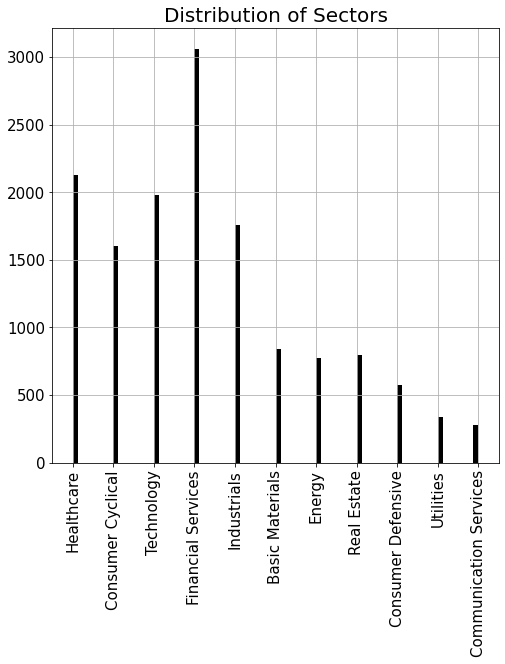

In [ ]:
hist = df_train['Sector'].hist(bins=80, figsize=(8, 8), color='black')
plt.yticks(fontsize=15)
plt.xticks(fontsize = 15, rotation=90)
plt.title('Distribution of Sectors')
plt.show()

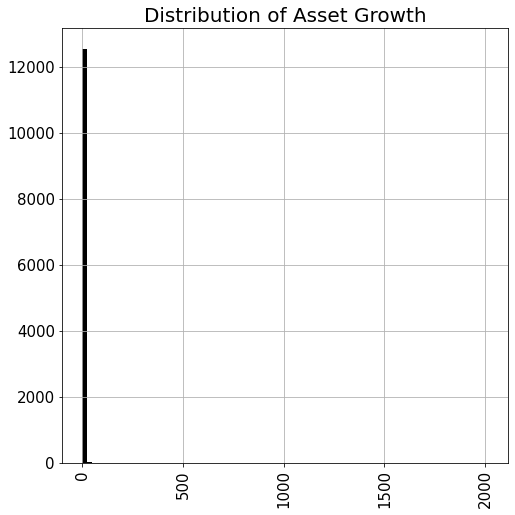

In [ ]:
hist = df_train['Asset Growth'].hist(bins=80, figsize=(8, 8), color='black')
plt.yticks(fontsize=15)
plt.xticks(fontsize = 15, rotation=90)
plt.title('Distribution of Asset Growth')
plt.show()

In [ ]:
df_train.corr()
# look at the correlations that are greater than 0.8

# could log transform variables that are not normally distributed (i.e. GDP)


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class
Revenue,1.000000,-0.002395,0.968103,0.813617,0.361517,0.676942,0.828985,0.703933,0.569828,0.681853,0.055003,0.365131,-0.003594,0.452827,0.111096,0.450220,0.001984,0.002018,0.235515,0.226328,0.017044,-0.015587,0.009795,0.009001,0.009937,0.010455,0.754483,0.604441,0.460562,0.008988,0.008981,0.146247,0.100057,0.118415,0.344605,0.365899,0.400993,0.820619,0.378792,0.086598,...,0.002454,-0.004076,-0.006959,-0.002569,-0.003408,-0.022729,-0.002232,0.000757,0.000847,0.002852,0.001189,0.000420,-0.002383,-0.000988,0.000499,-0.003730,-0.003077,0.069438,0.037191,0.007824,0.058984,0.027115,0.010980,0.033643,0.030899,0.016848,0.060552,0.030286,0.014772,0.081099,0.070245,0.049811,-0.004225,-0.007422,-0.008228,-0.000851,-0.006045,-0.005482,-0.005149,0.024162
Revenue Growth,-0.002395,1.000000,-0.002024,-0.002697,-0.001320,-0.002387,-0.002605,-0.002535,-0.002463,-0.002444,-0.000272,-0.000962,0.000124,-0.002046,-0.000848,-0.002031,0.000107,0.000109,-0.001216,-0.001200,-0.000744,-0.001099,0.000504,0.000444,0.000499,0.000354,-0.002590,-0.002371,-0.002079,0.000449,0.000446,-0.000864,-0.000821,-0.001032,-0.001298,-0.000527,-0.001234,-0.002252,-0.002037,-0.000810,...,0.000084,0.000311,-0.000023,-0.000374,-0.000103,0.000265,0.999588,-0.000032,-0.000082,-0.000033,-0.000494,-0.000091,-0.000098,-0.000099,-0.000403,-0.000026,-0.000720,-0.001029,0.004716,0.004818,-0.009026,-0.002459,-0.002000,-0.003615,-0.003037,-0.001852,-0.002033,0.000371,0.004927,0.000734,0.000062,-0.000460,0.049884,0.000743,0.000274,0.000263,0.000082,-0.000175,0.000084,-0.010401
Cost of Revenue,0.968103,-0.002024,1.000000,0.641972,0.284480,0.515488,0.642797,0.516264,0.478229,0.513177,0.043455,0.319418,-0.000418,0.290526,0.013144,0.290611,0.001623,0.001652,0.181185,0.174178,0.014256,-0.030465,0.007873,0.007161,0.008005,0.008567,0.595228,0.436983,0.297742,0.007293,0.007229,0.121185,0.037360,0.052821,0.470060,0.390284,0.291709,0.774764,0.240537,0.044758,...,0.002277,-0.003562,-0.006268,-0.002131,-0.002821,-0.026543,-0.001866,0.000508,0.000774,0.002368,0.001336,0.000651,-0.001977,-0.001849,-0.000277,-0.000727,0.000409,0.060612,0.028931,0.005018,0.052274,0.026929,0.011851,0.023783,0.018815,0.010732,0.051209,0.022167,0.011058,0.078039,0.056385,0.0378

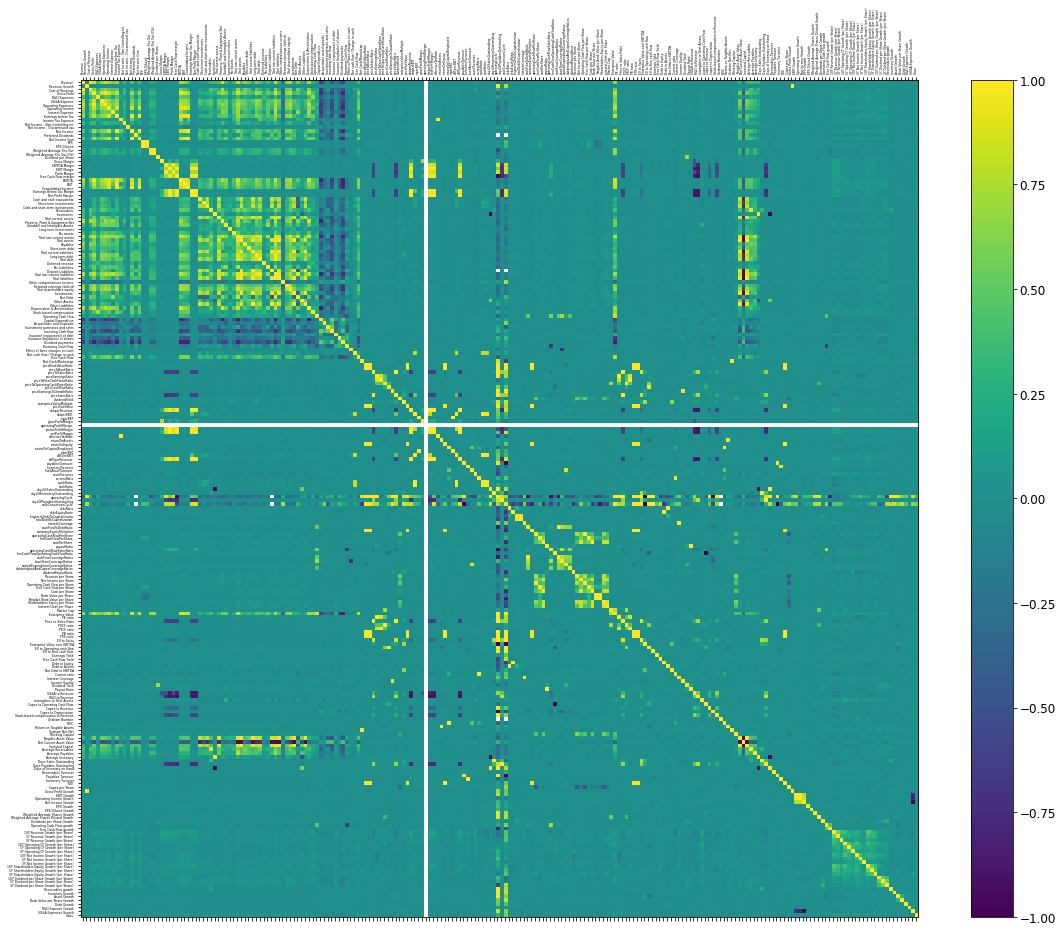

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_train.corr(), fignum=f.number)
plt.xticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=3, rotation=90)
plt.yticks(range(df_train.select_dtypes(['number']).shape[1]), df_train.select_dtypes(['number']).columns, fontsize=3)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.show()
# plt.title('Correlation Matrix', fontsize=20)

## Remove identifiers

In [ ]:
#Combine df_train, df_val, and df_test as df and call id_checker on it
df = pd.concat([df_train, df_val, df_test], sort=False)
df_id = id_checker(df)
df_id.head()

""
0
1
2
3
4


In [ ]:
import numpy as np

#Remove identifiers from df_train, df_val, and df_test
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
#Print the head of df_train
df_train.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,ACAD,124901000.0,6.2068,9077000.0,115824000.0,149189000.0,255062000.0,408234000.0,-292410000.0,0.0,-288284000.0,1119000.0,0.0,0.0,-289403000.0,0.0,-289403000.0,-2.36,-2.36,124205637.0,122600000.0,0.00,0.9273,-2.286,-2.3081,-2.317,-1.7499,-285571000.0,-288284000.0,-289403000.0,-2.3081,-2.3171,71893000.0,271924000.0,343817000.0,18430000.0,5248000.0,373477000.0,2662000.0,5538000.0,...,9.7693,6.8612,26.5098,-0.8632,-0.0066,7.1246,-0.0675,-0.0718,-0.0664,-0.0085,-0.0085,0.0582,0.0582,0.0000,-0.0449,-0.0412,0.1685,0.6283,8.4690,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0167,0.1214,-0.0493,0.0000,0.0000,0.0000,1.5812,0.2570,-0.3148,-0.3888,0.0000,0.5026,0.3679,Healthcare,0
1,JOUT,430489000.0,0.0119,258756000.0,171733000.0,16483000.0,137397000.0,153880000.0,17853000.0,865000.0,15753000.0,5137000.0,0.0,0.0,10616000.0,0.0,10616000.0,1.08,1.06,10006982.0,9727000.0,0.30,0.3989,0.066,0.0386,0.025,0.0178,28320000.0,16618000.0,10616000.0,0.0366,0.0247,69159000.0,0.0,69159000.0,44798000.0,79919000.0,198721000.0,45287000.0,25980000.0,...,9.6468,3.0407,5.8866,0.0536,-1.0686,0.0185,-0.0874,0.0696,0.1637,0.1613,0.1778,0.0099,0.0095,0.0000,-0.4564,-0.6408,0.0041,0.0132,0.0020,-0.0447,-0.0281,-0.1818,0.0325,0.0902,0.0031,0.0092,0.0824,0.0318,0.0000,0.0000,0.0000,0.0078,0.2047,0.0366,-0.0122,-0.0463,0.0010,0.0820,Consumer Cyclical,1
2,ITI,72251000.0,0.0590,44069000.0,28182000.0,5396000.0,24425000.0,30252000.0,-2070000.0,0.0,-1886000.0,-816000.0,0.0,-207000.0,-1070000.0,0.0,-1070000.0,-0.03,-0.03,32553876.0,32595000.0,0.00,0.3901,-0.011,-0.0261,-0.015,0.0359,-764000.0,-1886000.0,-1070000.0,-0.0261,-0.0148,21961000.0,0.0,21961000.0,15472000.0,3062000.0,44513000.0,1990000.0,18305000.0,...,4.2963,3.0512,25.7671,-0.0191,-0.0303,0.0850,-1.8926,-2.0102,-1.7594,-1.7500,-1.7500,-0.0021,-0.0077,0.0000,0.0925,0.0278,0.0191,0.0796,0.0915,0.1676,-0.1034,0.7785,0.0000,0.0000,0.0000,0.0954,0.0025,0.0198,0.0000,0.0000,0.0000,-0.1481,0.2027,0.0004,-0.0244,0.0000,0.3393,0.2676,Technology,1
3,CATO,849981000.0,-0.1114,553058000.0,296923000.0,0.0,266304000.0,285947000.0,10976000.0,114000.0,15973000.0,7433000.0,0.0,0.0,8540000.0,0.0,8540000.0,0.34,0.34,25031849.0,25031849.0,1.32,0.3493,0.042,0.0189,0.010,0.0293,35730000.0,16087000.0,8540000.0,0.0188,0.0100,

In [ ]:
#Print the head of df_val
df_val.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,INTT,3.888900e+07,-0.0696,2.019100e+07,1.869800e+07,3935000.0,1.220100e+07,1.613600e+07,2.562000e+06,0.0,2583000.0,722000.0,0.0,0.0,1861000.0,0.0,1861000.0,0.18,0.18,10562678.0,10473210.0,0.00,0.4808,0.086,0.0664,0.048,0.0745,3.337000e+06,2.583000e+06,1861000.0,0.0664,0.0479,2.571000e+07,0.0,2.571000e+07,4.395000e+06,3.520000e+06,3.426400e+07,1.112000e+06,2.810000e+06,...,8.2488,7.4092,10.6706,0.0518,-0.0572,-0.0862,-0.4738,-0.4788,-0.4589,-0.4545,-0.4545,0.0040,0.0027,0.0000,-0.3180,-0.3268,-0.0478,-0.0424,-0.0419,0.2214,-0.1230,-0.1977,0.0000,-0.2449,-0.0540,0.0285,0.1637,0.0820,0.0000,0.0000,-1.0000,-0.1269,-0.0661,0.0322,0.0410,0.0000,0.0992,0.0196,Technology,1
1,CNMD,7.963920e+08,0.0431,3.653510e+08,4.310410e+08,32307000.0,3.517990e+08,3.841060e+08,4.693500e+07,18203000.0,28732000.0,-26755000.0,0.0,0.0,55487000.0,0.0,55487000.0,1.99,1.97,27933864.0,27933864.0,0.80,0.5412,0.084,0.0589,0.070,0.0662,6.701400e+07,4.693500e+07,55487000.0,0.0361,0.0697,3.262200e+07,0.0,3.262200e+07,1.670370e+08,1.414360e+08,3.567830e+08,1.162290e+08,8.168940e+08,...,5.0520,5.3185,5.7438,0.0879,-0.4597,0.0556,0.3513,0.3513,2.7839,2.7547,2.7885,0.0040,0.0074,0.0000,0.6440,0.7397,0.0162,0.0115,0.0198,0.0019,-0.0682,-0.0029,0.0396,0.0693,0.1931,0.0250,0.0119,0.0229,0.0000,0.0592,0.0000,0.1268,0.0410,0.0218,0.0833,-0.0242,0.0016,0.0396,Healthcare,1
2,RELV,5.734496e+07,-0.1592,1.165773e+07,4.568723e+07,0.0,2.504860e+07,4.559150e+07,9.573000e+04,100142.0,-23431.0,-748000.0,0.0,0.0,724569.0,0.0,724569.0,0.42,0.42,1809374.0,1809427.0,0.00,0.7967,0.018,0.0013,0.013,-0.0227,1.038442e+06,7.671100e+04,724569.0,-0.0004,0.0126,4.989392e+06,0.0,4.989392e+06,3.867380e+05,5.177465e+06,1.153321e+07,6.925970e+06,2.925775e+06,...,172.4090,2.5489,11.0362,0.0426,-0.5019,-0.1568,-0.9493,-0.9363,-0.0670,0.0000,0.0000,0.0037,0.0037,-1.0000,-1.1553,-1.6067,-0.0308,-0.0733,-0.0868,0.0000,0.0000,0.0000,-0.1642,-0.2176,-0.1214,0.0146,0.0712,0.0481,-1.0000,-1.0000,-1.0000,0.3887,-0.0071,-0.0272,0.0498,-0.0270,0.0000,-0.0975,Consumer Defensive,0
3,QRTEA,1.049900e+10,0.0274,6.684000e+09,3.815000e+09,0.0,1.202000e+09,2.627000e+09,1.188000e+09,387000000.0,774000000.0,237000000.0,89000000.0,-88000000.0,537000000.0,17000000.0,520000000.0,1.07,1.06,475981509.0,475981509.

In [ ]:
#Print the head of df_test
df_test.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,NVEC,2.832620e+07,0.0220,6.078294e+06,2.224790e+07,3344101.0,1458598.0,4.802699e+06,1.744520e+07,0.0,1.909601e+07,6147142.0,0.0,0.0,1.294887e+07,0.0,1.294887e+07,2.68,2.68,4837010.0,4836602.0,4.000,0.7854,0.715,0.6741,0.457,0.4187,2.024346e+07,1.909601e+07,1.294887e+07,0.6741,0.4571,8199364.0,19591833.0,27791197.0,3.436802e+06,3.358298e+06,3.519358e+07,1.413248e+06,0.0,...,9.9725,19.7423,8.6314,0.1397,-0.1075,0.0544,0.0506,0.0712,0.0534,0.0593,0.0593,-0.0028,-0.0029,0.0000,-0.1349,-0.1542,0.0510,-0.0035,0.0309,0.0792,-0.0085,0.0004,0.0997,0.0244,0.0526,0.1400,0.0244,-0.0358,0.0000,0.0000,0.0000,0.5315,0.0478,-0.0702,-0.0637,0.0000,0.0924,-0.1679,Technology,1
1,SCSC,3.540226e+09,0.0999,3.184786e+09,3.554400e+08,0.0,240115000.0,2.572690e+08,9.817100e+07,2124000.0,9.601000e+07,32391000.0,0.0,0.0,6.361900e+07,0.0,6.361900e+07,2.40,2.38,25663707.0,26472000.0,0.000,0.1004,0.033,0.0277,0.018,0.0113,1.152880e+08,9.813400e+07,6.361900e+07,0.0271,0.0180,61400000.0,0.0,61400000.0,5.595570e+08,5.585810e+08,1.228905e+09,5.238800e+07,143842000.0,...,6.5433,1.8040,6.3694,0.0821,-0.4564,0.0867,-0.0351,-0.0570,-0.0275,0.0480,0.0485,-0.0730,-0.0733,0.0000,-0.3087,-0.2672,0.0743,0.0615,0.0889,0.1430,0.3775,-0.2492,0.0440,-0.0256,0.2441,0.1056,0.0600,0.0530,0.0000,0.0000,0.0000,0.0709,0.0100,0.0096,0.0328,7.7079,0.0000,0.1381,Technology,0
2,SO,1.846700e+10,0.0808,1.201200e+10,6.455000e+09,0.0,0.0,1.945000e+09,4.510000e+09,835000000.0,3.008000e+09,977000000.0,0.0,0.0,2.031000e+09,68000000.0,1.963000e+09,2.19,2.18,899812716.0,897000000.0,2.083,0.3495,0.332,0.2081,0.106,0.0250,6.136000e+09,3.843000e+09,2.031000e+09,0.1629,0.1100,710000000.0,0.0,710000000.0,1.947000e+09,1.969000e+09,5.864000e+09,5.486800e+10,0.0,...,9.8072,2.7060,8.6557,0.0971,-5.9677,0.0188,0.1360,0.0169,0.1940,0.1649,0.1658,0.0228,0.0227,0.0348,-0.0463,-0.0906,0.0264,0.0078,-0.0003,0.0592,0.0957,-0.0200,0.0089,0.0106,-0.0507,0.0531,0.0354,0.0302,0.0394,0.0376,0.0361,0.0704,-0.1432,0.0881,0.0352,0.0636,0.0000,0.0000,Utilities,1
3,RDUS,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,68280000.0,30797000.0,9.907700e+07,-9.907700e+07,1885000.0,-1.015260e+08,0.0,0.0,0.0,-1.015260e+08,0.0,-1.015260e+08,-2.56,-2.56,42922227.0,39643099.0,0.000,0.0000,NaN,0.0000,NaN,0.0000,-9.946500

## Transform Date Time Variables 

In [ ]:
#Find the date time variables and call datetime_transformer on df_train, df_val, and df_test
datetime_vars = []
df_train = datetime_transformer(df_train, datetime_vars)
df_val = datetime_transformer(df_val, datetime_vars)
df_test = datetime_transformer(df_test, datetime_vars)

In [ ]:
#Print the head of df_train
df_train.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,ACAD,124901000.0,6.2068,9077000.0,115824000.0,149189000.0,255062000.0,408234000.0,-292410000.0,0.0,-288284000.0,1119000.0,0.0,0.0,-289403000.0,0.0,-289403000.0,-2.36,-2.36,124205637.0,122600000.0,0.00,0.9273,-2.286,-2.3081,-2.317,-1.7499,-285571000.0,-288284000.0,-289403000.0,-2.3081,-2.3171,71893000.0,271924000.0,343817000.0,18430000.0,5248000.0,373477000.0,2662000.0,5538000.0,...,9.7693,6.8612,26.5098,-0.8632,-0.0066,7.1246,-0.0675,-0.0718,-0.0664,-0.0085,-0.0085,0.0582,0.0582,0.0000,-0.0449,-0.0412,0.1685,0.6283,8.4690,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0167,0.1214,-0.0493,0.0000,0.0000,0.0000,1.5812,0.2570,-0.3148,-0.3888,0.0000,0.5026,0.3679,Healthcare,0
1,JOUT,430489000.0,0.0119,258756000.0,171733000.0,16483000.0,137397000.0,153880000.0,17853000.0,865000.0,15753000.0,5137000.0,0.0,0.0,10616000.0,0.0,10616000.0,1.08,1.06,10006982.0,9727000.0,0.30,0.3989,0.066,0.0386,0.025,0.0178,28320000.0,16618000.0,10616000.0,0.0366,0.0247,69159000.0,0.0,69159000.0,44798000.0,79919000.0,198721000.0,45287000.0,25980000.0,...,9.6468,3.0407,5.8866,0.0536,-1.0686,0.0185,-0.0874,0.0696,0.1637,0.1613,0.1778,0.0099,0.0095,0.0000,-0.4564,-0.6408,0.0041,0.0132,0.0020,-0.0447,-0.0281,-0.1818,0.0325,0.0902,0.0031,0.0092,0.0824,0.0318,0.0000,0.0000,0.0000,0.0078,0.2047,0.0366,-0.0122,-0.0463,0.0010,0.0820,Consumer Cyclical,1
2,ITI,72251000.0,0.0590,44069000.0,28182000.0,5396000.0,24425000.0,30252000.0,-2070000.0,0.0,-1886000.0,-816000.0,0.0,-207000.0,-1070000.0,0.0,-1070000.0,-0.03,-0.03,32553876.0,32595000.0,0.00,0.3901,-0.011,-0.0261,-0.015,0.0359,-764000.0,-1886000.0,-1070000.0,-0.0261,-0.0148,21961000.0,0.0,21961000.0,15472000.0,3062000.0,44513000.0,1990000.0,18305000.0,...,4.2963,3.0512,25.7671,-0.0191,-0.0303,0.0850,-1.8926,-2.0102,-1.7594,-1.7500,-1.7500,-0.0021,-0.0077,0.0000,0.0925,0.0278,0.0191,0.0796,0.0915,0.1676,-0.1034,0.7785,0.0000,0.0000,0.0000,0.0954,0.0025,0.0198,0.0000,0.0000,0.0000,-0.1481,0.2027,0.0004,-0.0244,0.0000,0.3393,0.2676,Technology,1
3,CATO,849981000.0,-0.1114,553058000.0,296923000.0,0.0,266304000.0,285947000.0,10976000.0,114000.0,15973000.0,7433000.0,0.0,0.0,8540000.0,0.0,8540000.0,0.34,0.34,25031849.0,25031849.0,1.32,0.3493,0.042,0.0189,0.010,0.0293,35730000.0,16087000.0,8540000.0,0.0188,0.0100,

In [ ]:
#Print the head of df_val
df_val.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,INTT,3.888900e+07,-0.0696,2.019100e+07,1.869800e+07,3935000.0,1.220100e+07,1.613600e+07,2.562000e+06,0.0,2583000.0,722000.0,0.0,0.0,1861000.0,0.0,1861000.0,0.18,0.18,10562678.0,10473210.0,0.00,0.4808,0.086,0.0664,0.048,0.0745,3.337000e+06,2.583000e+06,1861000.0,0.0664,0.0479,2.571000e+07,0.0,2.571000e+07,4.395000e+06,3.520000e+06,3.426400e+07,1.112000e+06,2.810000e+06,...,8.2488,7.4092,10.6706,0.0518,-0.0572,-0.0862,-0.4738,-0.4788,-0.4589,-0.4545,-0.4545,0.0040,0.0027,0.0000,-0.3180,-0.3268,-0.0478,-0.0424,-0.0419,0.2214,-0.1230,-0.1977,0.0000,-0.2449,-0.0540,0.0285,0.1637,0.0820,0.0000,0.0000,-1.0000,-0.1269,-0.0661,0.0322,0.0410,0.0000,0.0992,0.0196,Technology,1
1,CNMD,7.963920e+08,0.0431,3.653510e+08,4.310410e+08,32307000.0,3.517990e+08,3.841060e+08,4.693500e+07,18203000.0,28732000.0,-26755000.0,0.0,0.0,55487000.0,0.0,55487000.0,1.99,1.97,27933864.0,27933864.0,0.80,0.5412,0.084,0.0589,0.070,0.0662,6.701400e+07,4.693500e+07,55487000.0,0.0361,0.0697,3.262200e+07,0.0,3.262200e+07,1.670370e+08,1.414360e+08,3.567830e+08,1.162290e+08,8.168940e+08,...,5.0520,5.3185,5.7438,0.0879,-0.4597,0.0556,0.3513,0.3513,2.7839,2.7547,2.7885,0.0040,0.0074,0.0000,0.6440,0.7397,0.0162,0.0115,0.0198,0.0019,-0.0682,-0.0029,0.0396,0.0693,0.1931,0.0250,0.0119,0.0229,0.0000,0.0592,0.0000,0.1268,0.0410,0.0218,0.0833,-0.0242,0.0016,0.0396,Healthcare,1
2,RELV,5.734496e+07,-0.1592,1.165773e+07,4.568723e+07,0.0,2.504860e+07,4.559150e+07,9.573000e+04,100142.0,-23431.0,-748000.0,0.0,0.0,724569.0,0.0,724569.0,0.42,0.42,1809374.0,1809427.0,0.00,0.7967,0.018,0.0013,0.013,-0.0227,1.038442e+06,7.671100e+04,724569.0,-0.0004,0.0126,4.989392e+06,0.0,4.989392e+06,3.867380e+05,5.177465e+06,1.153321e+07,6.925970e+06,2.925775e+06,...,172.4090,2.5489,11.0362,0.0426,-0.5019,-0.1568,-0.9493,-0.9363,-0.0670,0.0000,0.0000,0.0037,0.0037,-1.0000,-1.1553,-1.6067,-0.0308,-0.0733,-0.0868,0.0000,0.0000,0.0000,-0.1642,-0.2176,-0.1214,0.0146,0.0712,0.0481,-1.0000,-1.0000,-1.0000,0.3887,-0.0071,-0.0272,0.0498,-0.0270,0.0000,-0.0975,Consumer Defensive,0
3,QRTEA,1.049900e+10,0.0274,6.684000e+09,3.815000e+09,0.0,1.202000e+09,2.627000e+09,1.188000e+09,387000000.0,774000000.0,237000000.0,89000000.0,-88000000.0,537000000.0,17000000.0,520000000.0,1.07,1.06,475981509.0,475981509.

In [ ]:
#Print the head of df_test
df_test.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class
0,NVEC,2.832620e+07,0.0220,6.078294e+06,2.224790e+07,3344101.0,1458598.0,4.802699e+06,1.744520e+07,0.0,1.909601e+07,6147142.0,0.0,0.0,1.294887e+07,0.0,1.294887e+07,2.68,2.68,4837010.0,4836602.0,4.000,0.7854,0.715,0.6741,0.457,0.4187,2.024346e+07,1.909601e+07,1.294887e+07,0.6741,0.4571,8199364.0,19591833.0,27791197.0,3.436802e+06,3.358298e+06,3.519358e+07,1.413248e+06,0.0,...,9.9725,19.7423,8.6314,0.1397,-0.1075,0.0544,0.0506,0.0712,0.0534,0.0593,0.0593,-0.0028,-0.0029,0.0000,-0.1349,-0.1542,0.0510,-0.0035,0.0309,0.0792,-0.0085,0.0004,0.0997,0.0244,0.0526,0.1400,0.0244,-0.0358,0.0000,0.0000,0.0000,0.5315,0.0478,-0.0702,-0.0637,0.0000,0.0924,-0.1679,Technology,1
1,SCSC,3.540226e+09,0.0999,3.184786e+09,3.554400e+08,0.0,240115000.0,2.572690e+08,9.817100e+07,2124000.0,9.601000e+07,32391000.0,0.0,0.0,6.361900e+07,0.0,6.361900e+07,2.40,2.38,25663707.0,26472000.0,0.000,0.1004,0.033,0.0277,0.018,0.0113,1.152880e+08,9.813400e+07,6.361900e+07,0.0271,0.0180,61400000.0,0.0,61400000.0,5.595570e+08,5.585810e+08,1.228905e+09,5.238800e+07,143842000.0,...,6.5433,1.8040,6.3694,0.0821,-0.4564,0.0867,-0.0351,-0.0570,-0.0275,0.0480,0.0485,-0.0730,-0.0733,0.0000,-0.3087,-0.2672,0.0743,0.0615,0.0889,0.1430,0.3775,-0.2492,0.0440,-0.0256,0.2441,0.1056,0.0600,0.0530,0.0000,0.0000,0.0000,0.0709,0.0100,0.0096,0.0328,7.7079,0.0000,0.1381,Technology,0
2,SO,1.846700e+10,0.0808,1.201200e+10,6.455000e+09,0.0,0.0,1.945000e+09,4.510000e+09,835000000.0,3.008000e+09,977000000.0,0.0,0.0,2.031000e+09,68000000.0,1.963000e+09,2.19,2.18,899812716.0,897000000.0,2.083,0.3495,0.332,0.2081,0.106,0.0250,6.136000e+09,3.843000e+09,2.031000e+09,0.1629,0.1100,710000000.0,0.0,710000000.0,1.947000e+09,1.969000e+09,5.864000e+09,5.486800e+10,0.0,...,9.8072,2.7060,8.6557,0.0971,-5.9677,0.0188,0.1360,0.0169,0.1940,0.1649,0.1658,0.0228,0.0227,0.0348,-0.0463,-0.0906,0.0264,0.0078,-0.0003,0.0592,0.0957,-0.0200,0.0089,0.0106,-0.0507,0.0531,0.0354,0.0302,0.0394,0.0376,0.0361,0.0704,-0.1432,0.0881,0.0352,0.0636,0.0000,0.0000,Utilities,1
3,RDUS,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,68280000.0,30797000.0,9.907700e+07,-9.907700e+07,1885000.0,-1.015260e+08,0.0,0.0,0.0,-1.015260e+08,0.0,-1.015260e+08,-2.56,-2.56,42922227.0,39643099.0,0.000,0.0000,NaN,0.0000,NaN,0.0000,-9.946500

## Handle Missing Data 

With respect to the rest of the pipeline, the data was inspected for any uncommon features, as well as identifiers and date time variables. A notable proportion of the data, especially under the “operatingCycle” and “cashConversionCycle” features, was missing. To fix this, the Simple Imputer was installed to predict any missing values by applying the mean of the existing ones as a basis for its calculations.

In [ ]:
#Combine df_train, df_val, and df_test and call nan_checker on it
df = pd.concat([df_train, df_val, df_test], sort=False)
df_nan = nan_checker(df)
df_nan

,var,proportion,dtype
0,operatingCycle,0.999139,float64
1,cashConversionCycle,0.999139,float64
2,shortTermCoverageRatios,0.486660,float64
3,10Y Shareholders Equity Growth (per Share),0.438465,float64
4,10Y Revenue Growth (per Share),0.431762,float64
...,...,...,...
216,Retained earnings (deficit),0.052860,float64
217,Receivables,0.050052,float64
218,Operating Income,0.049871,float64
219,Net cash flow / Change in cash,0.046111,float64


In [ ]:
#Print the unique data types for any variables with Nan
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
#Find the variables with missing values, their proportion of missing values, and their data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)
df_miss

,var,proportion,dtype
0,operatingCycle,0.999139,float64
1,cashConversionCycle,0.999139,float64
2,shortTermCoverageRatios,0.486660,float64
3,10Y Shareholders Equity Growth (per Share),0.438465,float64
4,10Y Revenue Growth (per Share),0.431762,float64
...,...,...,...
216,Retained earnings (deficit),0.052860,float64
217,Receivables,0.050052,float64
218,Operating Income,0.049871,float64
219,Net cash flow / Change in cash,0.046111,float64


In [ ]:
#Separate the training, validation, and test data
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
#Print the dimensions of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,14128,224


In [ ]:
#Print the dimensions of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,3533,224


In [ ]:
#Print the dimensions of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4416,224


In [ ]:
from sklearn.impute import SimpleImputer

#If there are missing values
if len(df_miss['var']) > 0:
    #The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    #Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
#Combine df_train, df_val, and df_test, and print the variables' unique data types
df = pd.concat([df_train, df_val, df_test], sort=False)
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,object
1,float64
2,int64


## Encode Categorical Variables 

#### Drop features with a large number of categories 

However, some of the most critical steps in the pipeline surrounded the encoding process of the two categorical features, “Ticker” and “Sector”. Besides financial services, ten other industries were listed under the latter. During our first model run under the decision tree approach, we were unable to attain an accuracy score, owing to the 4980 unique stocks included in our data, as demonstrated by their tickers. Evidently, encoding “Ticker” slowed down the model’s capacity to peruse the data efficiently because of the inordinate number of dummy columns added, which by themselves took up more space in the resulting data frame than the financial indicators. Therefore, during our next run, we opted to drop “Ticker” prior to the encoding process, which significantly improved our model’s testing ability and gave us our first accuracy score. 

In [ ]:
#Call cat_var checker on df
df_cat = cat_var_checker(df)
df_cat

,var,nunique
0,Ticker,4980
1,Sector,11


In [ ]:
#Drop the features with a large number of categories and one-hot-encode the features in the combined data
df = df.drop(columns=['Ticker'])
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))
df.head()

#Ticker classified as an identifier when keeping only 2018 PRICE VAR [%]

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,124901000.0,6.2068,9077000.0,115824000.0,149189000.0,255062000.0,408234000.0,-292410000.0,0.0,-288284000.0,1119000.0,0.0,0.0,-289403000.0,0.0,-289403000.0,-2.36,-2.36,124205637.0,122600000.0,0.00,0.9273,-2.286,-2.3081,-2.317,-1.7499,-285571000.0,-288284000.0,-289403000.0,-2.3081,-2.3171,71893000.0,271924000.0,343817000.0,18430000.0,5248000.0,373477000.0,2662000.0,5538000.0,0.0,...,-0.0085,0.0582,0.058200,0.0000,-0.0449,-0.0412,0.168500,0.628300,8.469000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016700,0.121400,-0.049300,0.000000,0.0000,0.0000,1.5812,0.2570,-0.3148,-0.3888,0.0000,0.5026,0.3679,0,0,0,0,0,0,0,1,0,0,0,0
1,430489000.0,0.0119,258756000.0,171733000.0,16483000.0,137397000.0,153880000.0,17853000.0,865000.0,15753000.0,5137000.0,0.0,0.0,10616000.0,0.0,10616000.0,1.08,1.06,10006982.0,9727000.0,0.30,0.3989,0.066,0.0386,0.025,0.0178,28320000.0,16618000.0,10616000.0,0.0366,0.0247,69159000.0,0.0,69159000.0,44798000.0,79919000.0,198721000.0,45287000.0,25980000.0,0.0,...,0.1778,0.0099,0.009500,0.0000,-0.4564,-0.6408,0.004100,0.013200,0.002000,-0.044700,-0.028100,-0.181800,0.032500,0.090200,0.003100,0.009200,0.082400,0.031800,0.000000,0.0000,0.0000,0.0078,0.2047,0.0366,-0.0122,-0.0463,0.0010,0.0820,1,0,0,1,0,0,0,0,0,0,0,0
2,72251000.0,0.0590,44069000.0,28182000.0,5396000.0,24425000.0,30252000.0,-2070000.0,0.0,-1886000.0,-816000.0,0.0,-207000.0,-1070000.0,0.0,-1070000.0,-0.03,-0.03,32553876.0,32595000.0,0.00,0.3901,-0.011,-0.0261,-0.015,0.0359,-764000.0,-1886000.0,-1070000.0,-0.0261,-0.0148,21961000.0,0.0,21961000.0,15472000.0,3062000.0,44513000.0,1990000.0,18305000.0,0.0,...,-1.7500,-0.0021,-0.007700,0.0000,0.0925,0.0278,0.019100,0.079600,0.091500,0.167600,-0.103400,0.778500,0.000000,0.000000,0.000000,0.095400,0.002500,0.019800,0.000000,0.0000,0.0000,-0.1481,0.2027,0.0004,-0.0244,0.0000,0.3393,0.2676,1,0,0,0,0,0,0,0,0,0,1,0
3,849981000.0,-0.1114,553058000.0,296923000.0,0.0,266304000.0,285947000.0,10976000.0,114000.0,15973000.0,7433000.0,0.0,0.0,8540000.0,0.0,8540000.0,0.34,0.34,25031849.0,25031849.0,1.32,0.3493,0.042,0.0189,0.010,0.0293,35730000.0,16087000.0,8540000.0,0.0188,0.0100,81264000.0,119341000.0,200605000.0,28018000

In [ ]:
#Encode the categorical target in the combined data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target]).astype(str)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities
0,124901000.0,6.2068,9077000.0,115824000.0,149189000.0,255062000.0,408234000.0,-292410000.0,0.0,-288284000.0,1119000.0,0.0,0.0,-289403000.0,0.0,-289403000.0,-2.36,-2.36,124205637.0,122600000.0,0.00,0.9273,-2.286,-2.3081,-2.317,-1.7499,-285571000.0,-288284000.0,-289403000.0,-2.3081,-2.3171,71893000.0,271924000.0,343817000.0,18430000.0,5248000.0,373477000.0,2662000.0,5538000.0,0.0,...,-0.0085,0.0582,0.058200,0.0000,-0.0449,-0.0412,0.168500,0.628300,8.469000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016700,0.121400,-0.049300,0.000000,0.0000,0.0000,1.5812,0.2570,-0.3148,-0.3888,0.0000,0.5026,0.3679,0,0,0,0,0,0,0,1,0,0,0,0
1,430489000.0,0.0119,258756000.0,171733000.0,16483000.0,137397000.0,153880000.0,17853000.0,865000.0,15753000.0,5137000.0,0.0,0.0,10616000.0,0.0,10616000.0,1.08,1.06,10006982.0,9727000.0,0.30,0.3989,0.066,0.0386,0.025,0.0178,28320000.0,16618000.0,10616000.0,0.0366,0.0247,69159000.0,0.0,69159000.0,44798000.0,79919000.0,198721000.0,45287000.0,25980000.0,0.0,...,0.1778,0.0099,0.009500,0.0000,-0.4564,-0.6408,0.004100,0.013200,0.002000,-0.044700,-0.028100,-0.181800,0.032500,0.090200,0.003100,0.009200,0.082400,0.031800,0.000000,0.0000,0.0000,0.0078,0.2047,0.0366,-0.0122,-0.0463,0.0010,0.0820,1,0,0,1,0,0,0,0,0,0,0,0
2,72251000.0,0.0590,44069000.0,28182000.0,5396000.0,24425000.0,30252000.0,-2070000.0,0.0,-1886000.0,-816000.0,0.0,-207000.0,-1070000.0,0.0,-1070000.0,-0.03,-0.03,32553876.0,32595000.0,0.00,0.3901,-0.011,-0.0261,-0.015,0.0359,-764000.0,-1886000.0,-1070000.0,-0.0261,-0.0148,21961000.0,0.0,21961000.0,15472000.0,3062000.0,44513000.0,1990000.0,18305000.0,0.0,...,-1.7500,-0.0021,-0.007700,0.0000,0.0925,0.0278,0.019100,0.079600,0.091500,0.167600,-0.103400,0.778500,0.000000,0.000000,0.000000,0.095400,0.002500,0.019800,0.000000,0.0000,0.0000,-0.1481,0.2027,0.0004,-0.0244,0.0000,0.3393,0.2676,1,0,0,0,0,0,0,0,0,0,1,0
3,849981000.0,-0.1114,553058000.0,296923000.0,0.0,266304000.0,285947000.0,10976000.0,114000.0,15973000.0,7433000.0,0.0,0.0,8540000.0,0.0,8540000.0,0.34,0.34,25031849.0,25031849.0,1.32,0.3493,0.042,0.0189,0.010,0.0293,35730000.0,16087000.0,8540000.0,0.0188,0.0100,81264000.0,119341000.0,200605000.0,28018000

During the encoding process, a closer inspection of the data likewise found several columns with similar names. For example, “PE ratio” and “priceEarningsRatio” were both included despite them pointing to the same measure, defined as the proportion of a stock’s current market price to its earnings per share (EPS). To strengthen our model’s accuracy, several duplicate columns were dropped prior to standardizing the data.

The biggest step taken though lied in dropping the percent price variation (“PRICE VAR”) for each subsequent year earlier in the pipeline. As alluded to earlier, the sign of this column was strongly predictive of the target’s value. When “PRICE VAR” was positive, “Class” would equal 1. When it was negative, “Class” would equal 0. These observations applied to all years in our time span. We had originally planned on maintaining the five “PRICE VAR” columns as additional indicators. 

During our earlier model runs, depending on the hyperparameters installed, the highest accuracy resided anywhere from 0.92 to 0.99. Yet this posed a significant problem for our model by overfitting the data. While the “PRICE VAR” columns helped contribute to a substantially low error rate, they nevertheless weakened our model’s predictive performance. The inordinately strong relationship between “PRICE VAR” and “Class” limited the extent to which other financial indicators could likewise determine the target. Thus, it would’ve been erroneous for us to apply our model if it couldn’t maintain the same capacity toward predicting future observations as it did with our training set. In other words, high training accuracy did not necessarily entail high testing accuracy, the latter being our biggest goal over this project. These observations became even more apparent when plotting our feature importance chart, which reflected the disproportionate role of the five “PRICE VAR” columns over the target. Upon noticing this, we decided to drop “PRICE VAR” altogether to more precisely isolate the most critical financial indicators.

In [ ]:
#List all of the columns in df
list(df.columns.unique())

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [ ]:
#Drop any duplicate columns from df
df = df.drop(['priceToSalesRatio','priceEarningsRatio','priceSalesRatio','dividendYield',
              'returnOnEquity','payablesTurnover','inventoryTurnover','debtRatio',
              'debtEquityRatio','operatingCashFlowPerShare','freeCashFlowPerShare',
              'cashPerShare','payoutRatio','daysOfSalesOutstanding','daysOfPayablesOutstanding',
              'netProfitMargin','eBTperEBIT'],axis=1)

In [ ]:
#Separate the training, validation, and test data
df_train = df.iloc[:df_train.shape[0],:]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0],:]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
#Print the dimensions of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,14128,216


In [ ]:
#Print the dimensions of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,3533,216


In [ ]:
#Print the dimensions of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4416,216


## Standardize Data 

In [ ]:
#Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

#Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

#Standardize the training, validation, and test data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

# Hyperparameter Tuning

Once the pipeline was complete, our attention turned back to hyperparameter tuning. Before testing the data, several estimators - logistic regression, multi-layer perceptron classifier (MLPC), random forest, and histogram gradient boosting classifier (HGBC) - were installed with their respective parameter grids. The latter method was split into two, with one having a maximum depth of five edges from its root to its deepest leaf, and another having no such limit. We ran our model several times with varying parameter grids under the goal of enhancing its accuracy. Once we obtained the estimators’ scores, we then calculated their respective precisions, recalls, and F-scores. Their accuracies under the curve (AUC), defined as the proportion of true positive and true negative observations over the total number of observations, were also evaluated. To evaluate the tradeoff between time and accuracy, each estimator’s run time was recorded for comparison.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

#Make a dictionary for the models
models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed),
          'hgbc_v2': HistGradientBoostingClassifier(random_state=random_seed, max_depth=5)}

In [ ]:
from sklearn.pipeline import Pipeline

#Make a dictionary for the pipelines
pipes = {}
for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
#Get the predefined split cross-validator
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [ ]:
param_grids = {}

#Set up the parameter grid for Logistic Regression

#The parameter grid for tol
tol_grid = [10 ** 0, 10 ** 1, 10 ** 2]

#The parameter grid for C
C_grid = [0.1, 10, 100]

#Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [ ]:
#Set up the parameter grid for MLPClassifier
alpha_grids = [10 ** i for i in range(-6, -1)]
learning_rate_init_grids = [10 ** i for i in range(-5, -1)]

#Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [ ]:
#Set up the parameter grid for random forest
min_samples_split_grids = [3, 25, 105]
min_samples_leaf_grids = [2, 15, 100]

#Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
#Set up the parameter grid for histogram-based gradient boosting
learning_rate_grids = [10 ** i for i in range(-6, 3)]
min_samples_leaf_grids = [1, 3, 5, 7, 10, 20]

#Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

param_grids['hgbc_v2'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
#Make a directory for the GridSearchCV results
directory = os.path.dirname(abspath_curr + '/result_test/stocks/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    now = datetime.now()
    
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result_test/stocks/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

    final_time = datetime.now()

    total_time_taken = ((final_time - now).total_seconds())/60
    print(f"The time taken for {acronym} method is {total_time_taken} mins")


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

The time taken for lr method is 0.10129408333333334 mins
The time taken for mlpc method is 1.0555441166666666 mins
The time taken for rfc method is 1.4666277833333334 mins
The time taken for hgbc method is 4.586191299999999 mins
The time taken for hgbc_v2 method is 2.8372360166666666 mins


,best_score,best_param,best_estimator
0,0.627299,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
1,0.620677,"{'model__min_samples_leaf': 15, 'model__min_sa...","((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
2,0.619948,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
3,0.574074,"{'model__C': 0.1, 'model__tol': 1}","(LogisticRegression(C=0.1, class_weight='balan..."
4,0.572559,"{'model__alpha': 0.01, 'model__learning_rate_i...","(MLPClassifier(activation='relu', alpha=0.01, ..."


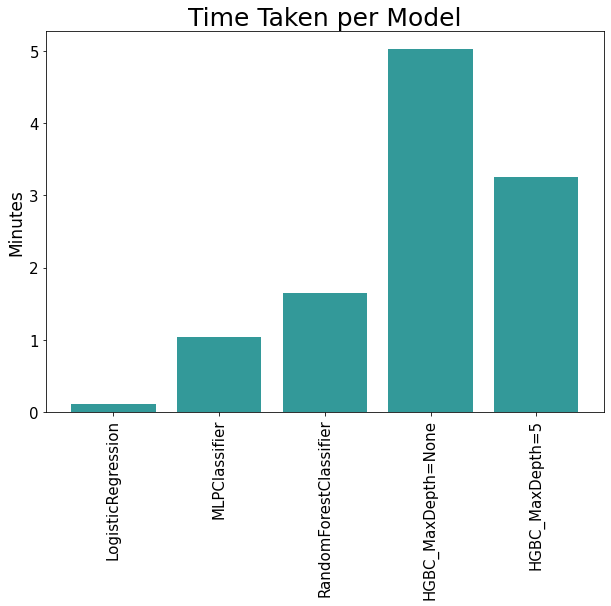

In [ ]:
_model = ['LogisticRegression', 'MLPClassifier', 'RandomForestClassifier', 'HGBC_MaxDepth=None', 'HGBC_MaxDepth=5']
plt.figure(figsize = [10,7])
time_elapsed = [0.11076851666666668, 1.0422226333333333, 1.63980305, 5.023266183333333, 3.2562505]
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.ylabel('Minutes', fontsize = 17)
plt.title('Time Taken per Model', fontsize = 25)
plt.bar(_model, time_elapsed, color = 'teal', alpha = 0.8)
plt.show()



In [ ]:
 #Isolate the estimator with the highest accuracy in testing the model
d = pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])
d['best_estimator'][0]

Pipeline(memory=None,
         steps=[('model',
                 HistGradientBoostingClassifier(l2_regularization=0.0,
                                                learning_rate=0.1, loss='auto',
                                                max_bins=255, max_depth=None,
                                                max_iter=100, max_leaf_nodes=31,
                                                min_samples_leaf=10,
                                                n_iter_no_change=None,
                                                random_state=42, scoring=None,
                                                tol=1e-07,
                                                validation_fraction=0.1,
                                                verbose=0, warm_start=False))],
         verbose=False)

From what we can see, it is apparent that the HGBC with no maximum depth offers the best accuracy at 0.627299. In extension, it took the greatest amount of time (about 5.02 minutes) to evaluate. As a comparison, if the HGBC is limited to a maximum depth of 5, its accuracy drops to 0.619948. In fact, the random forest method outperformed the limited HGBC with respect to its accuracy (0.620677) and took significantly less time to evaluate (about 1.64 minutes). On a side note, while the logistic regression method was the quickest to evaluate (about 0.11 minutes), its accuracy was comparatively weaker (0.574074) and only beat the MLPC method slightly (0.572559). These observations taken together underline the tradeoff between speed and accuracy that frequently ensues when outlining a model. The latter especially becomes more critical when accounting for future observations.

In [ ]:
# The list of [precision, recall, fscore, auc, best_estimator]
precision_recall_fscore_auc_best_estimator = []

for best_score, best_param, best_estimator in best_score_params_estimator_gs:
  # Get the prediction
  y_pred = best_estimator.predict(X_test)

  # Get the precision, recall, fscore, support
  precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

  # Get the auc
  # Convert array elements to integers 
  auc = roc_auc_score(y_test.astype(int), y_pred.astype(int))

  # Update precision_recall_fscore_auc_best_estimator
  precision_recall_fscore_auc_best_estimator.append([precision, recall, fscore, auc, best_estimator])

  # Print precision_recall_fscore_best_estimator
  pd.DataFrame(precision_recall_fscore_auc_best_estimator,
                        columns=['Precision', 'Recall', 'F1-score', 'AUC', 'Model'])

In [ ]:
p = pd.DataFrame(precision_recall_fscore_auc_best_estimator,
                        columns=['Precision', 'Recall', 'F1-score', 'AUC', 'Model'])
p

,Precision,Recall,F1-score,AUC,Model
0,"[0.5988700564971752, 0.6404534183492738]","[0.4845099035043169, 0.7388639149979567]","[0.5356541268950029, 0.6861480075901328]",0.611687,(HistGradientBoostingClassifier(l2_regularizat...
1,"[0.5743539736713799, 0.66553911205074]","[0.5982732351447435, 0.6432366162648141]","[0.5860696517412936, 0.6541978387364921]",0.620755,"((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
2,"[0.5987179487179487, 0.6376050420168067]","[0.4743524631792788, 0.7441765427053535]","[0.5293284216491925, 0.6867810673203847]",0.609265,(HistGradientBoostingClassifier(l2_regularizat...
3,"[0.5255837059115748, 0.6208905534748231]","[0.537328593194515, 0.6097261953412342]","[0.5313912606730286, 0.6152577319587629]",0.573527,"(LogisticRegression(C=0.1, class_weight='balan..."
4,"[0.5463096960926194, 0.5998681608437706]","[0.38344337227018793, 0.7437678790355537]","[0.45061175768427336, 0.6641123882503193]",0.563606,"(MLPClassifier(activation='relu', alpha=0.01, ..."


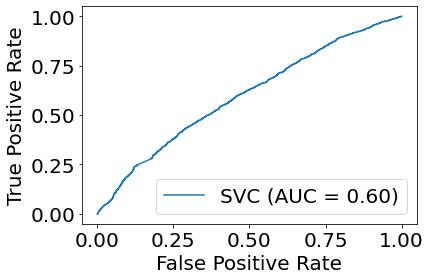

In [ ]:
from sklearn import datasets, metrics, model_selection, svm

clf = svm.SVC(random_state=42)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show() 

# Model Selection

## Getting the feature importance detected by random forest

To identify the most critical financial indicators, we investigated the random forest method approach further by creating a new data frame ranking the features from most to least importance. The top ten were isolated for reference. From our model, we determined the four most instrumental ones to be Effect of forex changes on cash (1.244%), Earnings Yield (1.201%), PE ratio (1.108%), and Net Income (1.079%).

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[1]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 10 rows of df_fi_rfc
df_fi_rfc.head(10)

,Features,Importance
0,Effect of forex changes on cash,0.0124394
1,Earnings Yield,0.012006
2,PE ratio,0.0110819
3,Net Income,0.0107911
4,Book Value per Share Growth,0.00954223
5,EBIT,0.00907976
6,Tangible Asset Value,0.00841368
7,returnOnCapitalEmployed,0.00825597
8,effectiveTaxRate,0.00823676
9,ROIC,0.00803318


## Plotting the Feature Importance

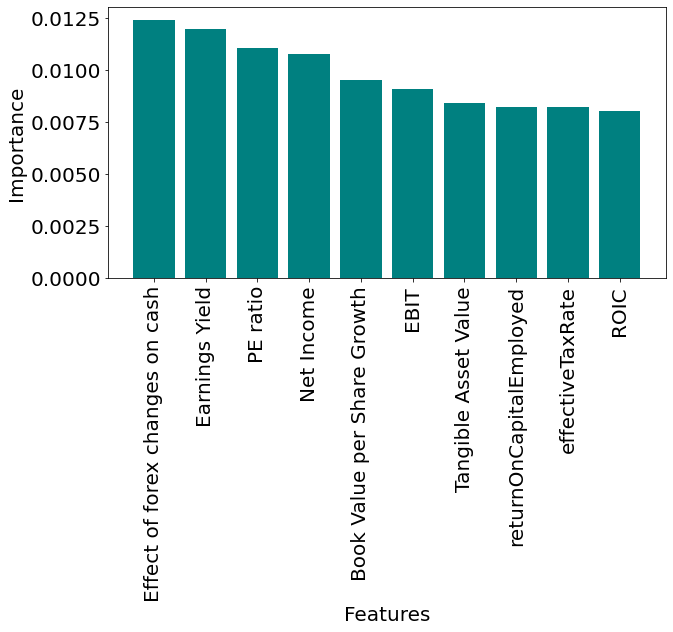

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top x feature importance
plt.bar(df_fi_rfc['Features'][:10], df_fi_rfc['Importance'][:10], color='teal')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result_test/feature_importance_rfc.pdf')
plt.show()

In [ ]:
df_fi_rfc['Features']

0      Effect of forex changes on cash
1                       Earnings Yield
2                             PE ratio
3                           Net Income
4          Book Value per Share Growth
                    ...               
210      Sector_Communication Services
211          Sector_Consumer Defensive
212              operatingProfitMargin
213                     operatingCycle
214                cashConversionCycle
Name: Features, Length: 215, dtype: object

Not surprisingly, the accelerating tide of globalization brings with it new opportunities and challenges for companies in the US and abroad today. Since the 1970s, the floating exchange rate system adopted around the globe further underlines this effect. Thus, movements within the foreign exchange (forex) market can impact how well companies will perform financially across borders. These movements can permeate into the stock market as well. 

Economies of scale can predict a company’s performance across borders. Performance improves when the business enhances its production while minimizing costs along the way. Greater efficiency thus gives the business a competitive advantage to scale its operations further and hedge more effectively against exchange rate risk, both of which may present more fruitful prospects for an investor within the stock market. This can apply to domestic and international stocks alike.

Shifts in the exchange rate have critical ramifications for interest rates in the US, and by extension stock prices. When the dollar depreciates, interest rates decline, which encourages businesses to borrow more and catalyzes growth. This increase in economic activity makes investing in stocks more desirable, as shares turn more expensive as companies increase their profitability with their enhanced ability to finance a greater number of operations than earlier. That being said, depreciation comes with the threat of inflation, which if left unattended for too long can weaken the real value of an investment over time, and precipitate reckless borrowing. The latter was a prominent feature of the financial crisis of 2008. On the other hand, if the dollar appreciates, interest rates rise to tighten the money supply and guard against inflation, benefitting savers. In the process though, this can lower a company’s earnings potential by reducing its ability to borrow and invest at the same level as earlier because of the higher rates. As in this case a stock’s chances to rise in price become more limited, an investor may switch to bonds, which turn cheaper amid higher interest rates. 

Taken over the last twelve months, the earnings yield for a stock is defined as the ratio between its EPS and current market price, and is in fact the inverse of the PE (price-to-earnings) ratio. This can partly explain why these two features were especially critical in deciding whether or not a stock was worth buying over our time span. According to Investopedia, the earnings yield is a frequently cited factor for estimating a company’s growth prospects. The lower the ratio, the more likely a stock is overvalued. In contrast, a higher ratio may point to an undervalued stock. That being said, if a business is bullish about its growth potential, its stock may maintain a higher value even as its price rises over time. While some investors may opt to short an overvalued stock, if the business remains bullish about its future profitability, it may be more prudent for an investor to hold on to that stock and wait for it to grow further before selling it off. Under a similar approach, the greater the PE ratio, the more an investor is willing to pay for a stock for every $1 the company earns, and thus the greater the chance that a stock is overvalued. 

Finally, we turn to net income. An essential measure in accounting and financial statements, this represents the sum of all sales minus the cost of goods sold (COGS), depreciation, interest, taxes, and other expenses. Applied by a business to calculate its EPS, factors such as the corporate tax rate and the state of the economy can sway how much net income it can accumulate. The impact on domestic and international branches, as well as stocks, may not be uniform.


## Conclusions

In conclusion, we were given multivariate datasets whose primary goal was to classify whether to buy the stock of a particular company based on the various financial indicators.  Doing so, the procedure of data preprocessing, hyperparameter tuning, and model selection was followed to generate the best accuracy model that we could obtain from there. From all the machine learning techniques, we implemented logistic regression, MLP classifier, histogram-gradient boosting classifier (HGBC), and random forest classifier. In the HGBC’s case, it ran with the option of a maximum depth of 5 or no limit at all to its depth. Out of all these methods, the HGBC with no maximum depth yielded us the highest accuracy model of 0.627299. On top of that, other different machine learning classification metrics were implemented such as Precision, Recall, F1, and AUC. The HGBC with no maximum depth likewise performed better in terms of accuracy compared to the other models. 

Using the random forest model, we also analyzed which feature had the greatest significance on affecting our target. As a result, Effect of forex changes on cash (1.244%) was the most critical feature in determining whether to buy a stock. This was closely followed by features such as Earnings Yield (1.201%), PE ratio (1.108%), and Net Income (1.079%). While calculating the significance of all these features we compromised one categorical variable by dropping it rather than encoding it with the rest of the data. The reason to drop the column named “Ticker” was that we had more than 200 columns as our feature to feed into our model. This column referred to the abbreviated names of the companies as designated in the stock market during trading hours. In our case we were trying to classify the target variable regardless of the company name; thus dropping “Ticker” further aided us to interpret the result and identify the most important financial indicators. 

The model that we uploaded helps us to classify the stock prices based on the conditions that we were given. As a fact, the financial market is a huge area where many variables can come into a big play. Thus, this model can be used where the same numbers or type of variables will be accounted for in determining whether to buy a stock. In other words, as a limitation there might be other significant variables that could drive a stock’s price which this model excluded. Such variables, for any year in our time span, may be taken from a macroeconomic scale, such as a sector’s GDP, the corporate tax rate, and the federal funds rate. Even while considering these limitations, this model can be used to help an investor determine whether to buy a stock or not based on its forecasted value over the following year. 

Citations for this project have been included in the bottom cell of its accompanying Colaboratory notebook.

# Citations

In [ ]:
#https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018 
#---
#200+ Financial Indicators of US stocks (2014-2018)

#https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2020/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s5_tree_based_models/case_study/case_study.ipynb
#---
#github: teaching / gwu / machine_learning_I / fall_2020 / code / p2_shallow_learning / p2_c2_supervised_learning / p2_c2_s5_tree_based_models / case_study / case_study.ipynb

#https://moneyminiblog.com/investing/how-stock-market-affects-forex/
#---
#How Stock Markets Affect the Forex Market and Vice Versa

#https://www.investopedia.com/terms/e/earningsyield.asp
#---
#Earnings Yield Definition

#https://www.investopedia.com/terms/p/price-earningsratio.asp
#---
#Price-to-Earnings Ratio – P/E Ratio

#https://fxdailyreport.com/factors-affecting-forex-bonds-stock-equities-markets/
#---
#Factors Affecting Forex, Bonds, Stock or Equities Markets

#https://www.investopedia.com/investing/how-interest-rates-affect-stock-market/
#---
#How Do Interest Rates Affect the Stock Market?

#https://www.investopedia.com/terms/n/netincome.asp
#---
#Net Income (NI)